### `simulation.ipynb`
----------------------

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import langevin as lg
import importlib

sim = lg.Langevin3D()

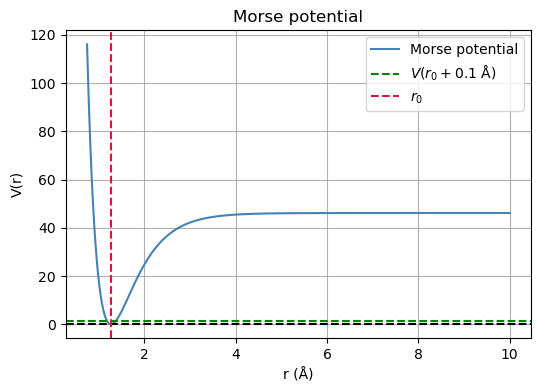

In [446]:
rv = np.linspace(0.75, 10, 1000)
pv = sim.potential_Morse(rv)

plt.figure(figsize=(6, 4))
plt.plot(rv, pv, label='Morse potential', color='steelblue')
plt.grid()
plt.axhline(0, color='black', lw=1.5, ls='--')
plt.axhline(sim.potential_Morse(sim.r_0+0.1), color='green', lw=1.5, ls='--', label=r'$V(r_0 + 0.1$ Å)')
plt.axvline(sim.r_0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel(r"r (Å)")
plt.ylabel("V(r)")
plt.title("Morse potential")
plt.legend(loc='upper right')

In [453]:
importlib.reload(lg)
sim = lg.Langevin3D(seed=4, T=None, dt=1e-16)
data = sim.run(n_steps=1000, r_init_relative=sim.r_0+0.1, mode='langevin')

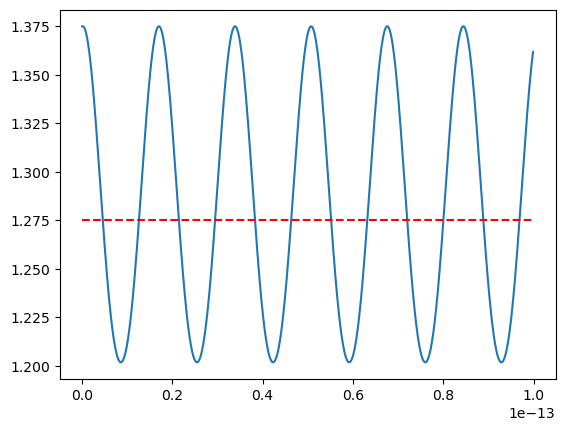

In [454]:
plt.plot(data['time'], data['r_rel'])
plt.plot(data['time'], sim.r_0 * np.ones_like(data['time']), ls='--', color='red', label=r'$r_0$')

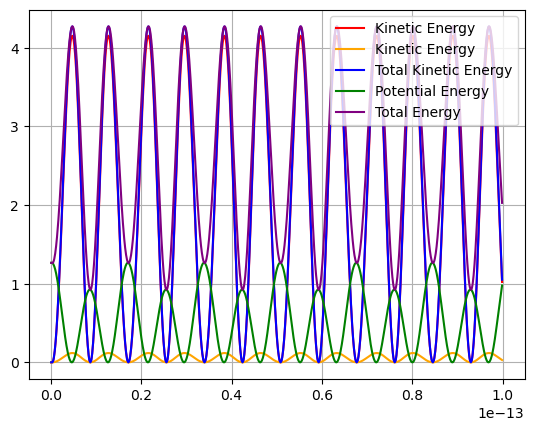

In [458]:
## energy plot
time = data['time']
kinetic_e_H = data['kinetic_energy_H']
kinetic_e_Cl = data['kinetic_energy_Cl']
potential_e = data['potential_energy']

plt.plot(time, kinetic_e_H, label='Kinetic Energy', color='red')
plt.plot(time, kinetic_e_Cl, label='Kinetic Energy', color='orange')
plt.plot(time, kinetic_e_H + kinetic_e_Cl, label='Total Kinetic Energy', color='blue')
plt.plot(time, potential_e, label='Potential Energy', color='green')
plt.plot(time, kinetic_e_H + kinetic_e_Cl + potential_e, label='Total Energy', color='purple')
plt.grid()
plt.legend(loc='upper right')
#plt.plot(time, potential_e, label='Potential Energy', color='green')

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.88588303e-04
  3.07696404e-05 -4.51041438e-05] [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.88588303e-04
  3.07696404e-05 -4.51041438e-05] [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.88588303e-04
  3.07696404e-05 -4.51041438e-05]


Text(0.5, 0.92, '3D Trajectory of Cl and H Atoms')

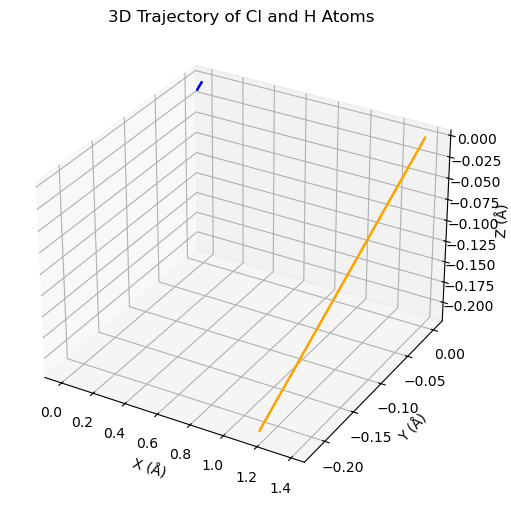

In [420]:
## 3D position of r_Cl, r_H over time
r_cl = data['r_Cl']
r_h = data['r_H']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
print(r_cl[:, 0], r_cl[:, 1], r_cl[:, 2])
ax.plot(r_cl[:, 0], r_cl[:, 1], r_cl[:, 2], color='blue', label='Cl')
ax.plot(r_h[:, 0], r_h[:, 1], r_h[:, 2], color='orange', label='H')
ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
ax.set_title('3D Trajectory of Cl and H Atoms')

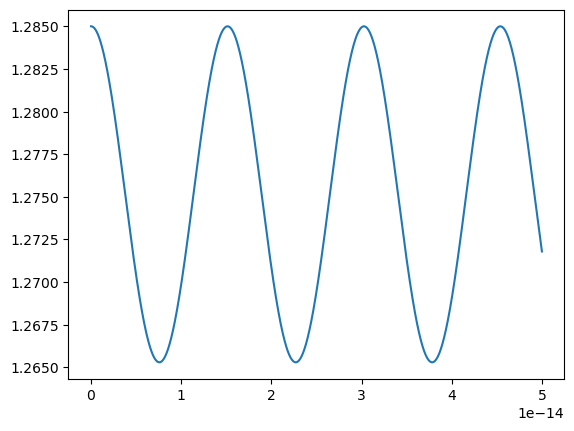

In [327]:
plt.plot(data['time'], data['r_rel'])

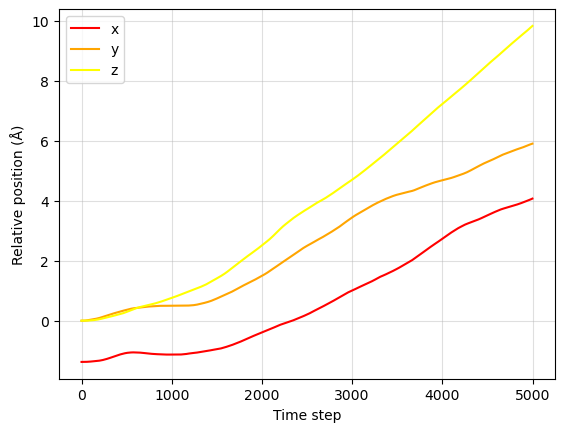

In [303]:
rel = r_cl - r_h
colors = ['red', 'orange', 'yellow']
pos_labels = ['x', 'y', 'z']
for i in range(len(rel.T)):
    plt.plot(rel[:, i], color=colors[i], label=pos_labels[i])
plt.xlabel("Time step")
plt.ylabel("Relative position (Å)")
plt.grid(True, alpha=0.4)
plt.legend()

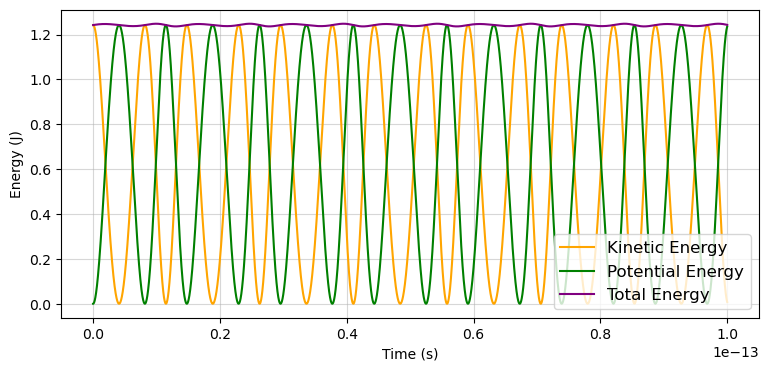

In [250]:
plt.figure(figsize=(9, 4))
plt.plot(time, kinetic_e, label='Kinetic Energy', color='orange')
plt.plot(time, potential_e, label='Potential Energy', color='green')
plt.plot(time, total_e, label='Total Energy', color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
plt.grid(True, alpha=0.5)
plt.legend(loc='lower right', fontsize=12)

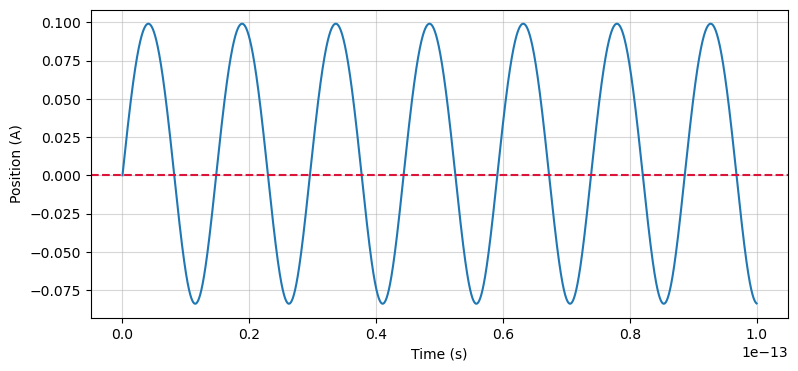

In [251]:
plt.figure(figsize=(9, 4))
plt.plot(time, traj-sim.r_0)
plt.axhline(0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel("Time (s)")
plt.ylabel("Position (A)")
plt.grid(True, alpha=0.5)

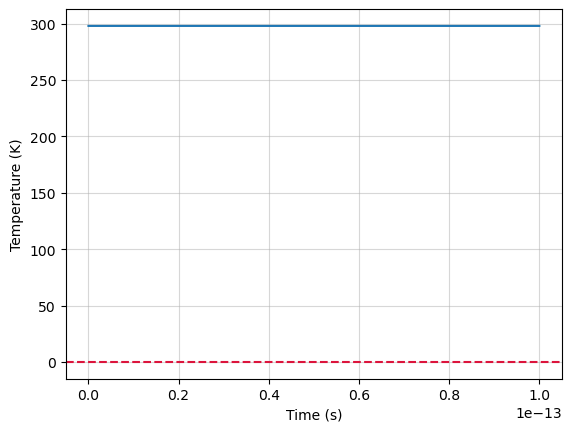

In [252]:
temp = sim.temperature(speed)
plt.plot(time, temp * np.ones_like(time))
plt.axhline(0, color='crimson', lw=1.5, ls='--', label=r'$r_0$')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.grid(True, alpha=0.5)

Text(0.5, 0, 'Z (Å)')

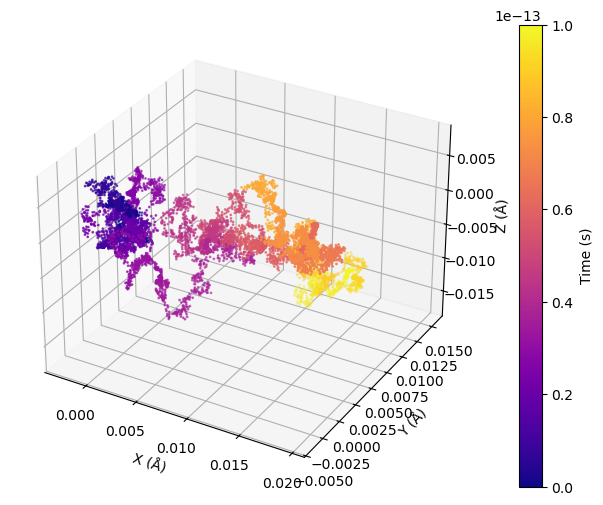

In [253]:
traj_3D, speed_3D = sim.v_to_trajectory(speed)
# do a 3D plot of the trajectory, coloring with the speed
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
time_array = np.arange(len(traj_3D)) * sim.dt
p = ax.scatter(traj_3D[:,0], traj_3D[:,1], traj_3D[:,2], cmap='plasma', c=time_array, s=1)
fig.colorbar(p, label='Time (s)')
ax.set_xlabel("X (Å)")
ax.set_ylabel("Y (Å)")
ax.set_zlabel("Z (Å)")